## TP3: Un peu d'analyse de données

On va faire un peu d'analyse de données, avec ou sans numpy et ses matrices.

Au passage, on va voir comment faire un peu de visualisation en Python, en utilisant le module
matplotlib (librairie en plus, mais disponible avec tous les outils scientifiques)

La commande essentielle, plot, prend deux listes de coordonnées (abscisses et ordonnées), et trace la courbe correspondante reliant les points. Spyder gère automatiquement l'affichage dans sa console IPython.

**Ce TP sera à rendre** cf le devoir sur moodle qui sera ouvert 

**Utilisez le notebook** ce sera plus simple pour tester + mettre vos analyses/commentaires

In [1]:
%matplotlib inline
from IPython.display import Image

Parabole:


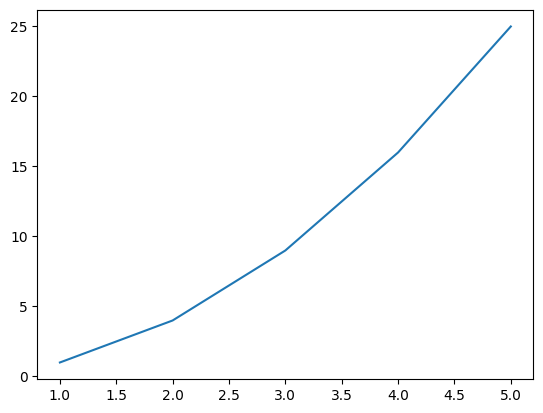

In [2]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,5],[1,4,9,16,25])
print("Parabole:")

En option, on peut définir une couleur et une forme avec une chaine en 3e argument ("r" pour red, "o" pour un point)

Parabole


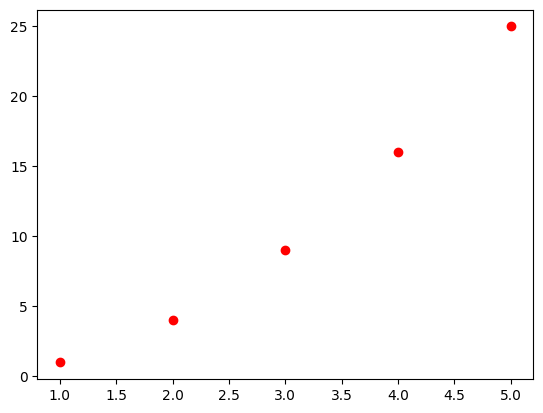

In [3]:
plt.plot([1,2,3,4,5],[1,4,9,16,25],"ro")
print("Parabole")

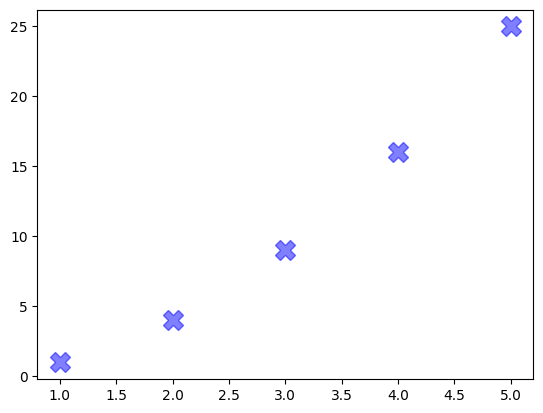

In [4]:
#quelques variantes
plt.plot([1,2,3,4,5],[1,4,9,16,25],"bX",markersize=15,alpha=0.5)
print()

Pour contrôler un peu l'affichage, on peut fixer les extrémités des axes, et les forcer à être à la même échelle

Parabole encore


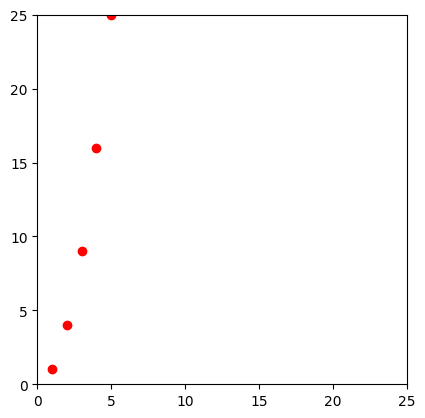

In [5]:
plt.axes().set_aspect('equal')
plt.xlim(0,25)
plt.ylim(0,25)

plt.plot([1,2,3,4,5],[1,4,9,16,25],"ro")
print("Parabole encore")

### Première partie: classification 

Passons maintenant aux choses sérieuses. On va considérer que l'on a des données de deux types différents (appelons les "rouge" et "bleu"), caractérisées par deux valeurs entre 0 et 1. 
On pourrait alors avoir une visualisation comme ceci: 

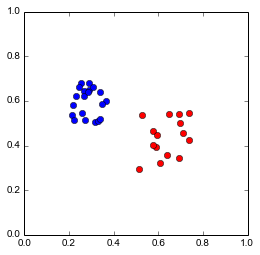

In [6]:
Image(filename="TP/blobs2.png")

Le but de ce TP est de définir un moyen de "classer" une nouvelle donnée pour dire si elle est plutôt de la classe bleue ou rouge. 
Pour cela, un moyen simple (voire simplet, mais vous creuserez la question au 2e semestre), est de calculer le barycentre
(centre de gravité) des points de chaque classe, ici en jaune: 
<img src="TP/blobs2_centres.png">

Puis de considérer leur médiatrice: 
<img src="TP/blobs2_separateur.png">

En enfin de considérer que tout ce qui est du même côté que le groupe bleu/rouge doit être bleu/rouge:
<img src="TP/classif_barycentre.png">

Evidemment, ça ne marchera pas pour tout type de données: 
<img src="TP/classif_ouch.png">

Cette méthode nécessite que les données soit séparables linéairement. Mais passons. 

**A FAIRE**

1. en utilisant la fonction random.random(), faire une fonction "blob" qui génère un "nuage" de n points autour d'une position donnée ($x_0$,$y_0$), avec un étalage réglable (distance maxi par rapport à la position donnée). Par exemple, la figure initiale a été générée avec les paramètres (vous être libre du nom de la fonction):
     > g1 = blob(0.3,0.6,20,scale=0.1)
     
     > g2 = blob(0.6,0.4,15,scale=0.15) 
 
     La fonction renvoie juste les coordonnées. 
     
     Ecrivez aussi une fonction qui prend la sortie de "blob" et fait la figure du nuage en utilisant plt.plot
 
2. Ecrivez une fonction qui détermine le centre d'un groupe
 

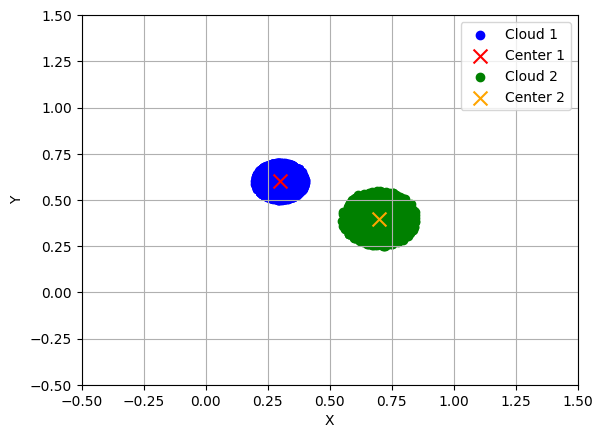

In [26]:

import random
import numpy as np
def blob(nbPoint, coo, scale):
    pointN = []
    while len(pointN) < nbPoint:  
        randomX = random.uniform(coo[0] - scale, coo[0] + scale)
        randomY = random.uniform(coo[1] - scale, coo[1] + scale)
        
       
        norm = np.sqrt((randomX - coo[0]) ** 2 + (randomY - coo[1]) ** 2)
        
        if norm <= scale:
            pointN.append((randomX, randomY))

    return pointN

def plot_two_clouds(points1, center1, points2, center2, color1='blue', color2='green'):
    #1
    x_coords1 = [point[0] for point in points1]
    y_coords1 = [point[1] for point in points1]
    #2
    x_coords2 = [point[0] for point in points2]
    y_coords2 = [point[1] for point in points2]
    
    #plot1
    plt.scatter(x_coords1, y_coords1, color=color1, label='Cloud 1')
    
    
    plt.scatter(center1[0], center1[1], color='red', marker='x', s=100, label='Center 1')
    

    #plot2
    plt.scatter(x_coords2, y_coords2, color=color2, label='Cloud 2')
    
    plt.scatter(center2[0], center2[1], color='orange', marker='x', s=100, label='Center 2')
    
    plt.xlim(-0.5, 1.5)  
    plt.ylim(-0.5, 1.5)  

    plt.xlabel('X')
    plt.ylabel('Y')


    plt.grid(True)
    plt.legend()
    plt.show()

def barycentre(cloud):
    sum_x = 0
    sum_y = 0
    for point in cloud :
        sum_x+= point[0]
        sum_y+= point[1]

    n=len(cloud)
    bary_x = sum_x/n    
    bary_y = sum_y/n

    return (bary_x,bary_y)



g1 = blob(3000, (0.3, 0.6), 0.1)
g2 = blob(1000, (0.7, 0.4), 0.15)
plot_two_clouds(g1, barycentre(g1), g2, barycentre(g2))


  Voici une fonction qui calcule le séparateur de deux groupes (la médiatrice): pour cela il suffit de renvoyer un point de la droite, par exemple le milieu M des centres des 2 groupes, et un vecteur normal à la droite $\vec{w}$ (par exemple le vecteur défini par les deux centres). La fonction suppose que la fonction "centre" a déjà été écrite, 
  et que g1, g2, c1 et c2 sont des vecteurs ou matrices numpy. Adaptez si vous avez fait différemment pour les fonctions blob et centre. 
  
La fonction qui affiche le séparateur est donnée aussi

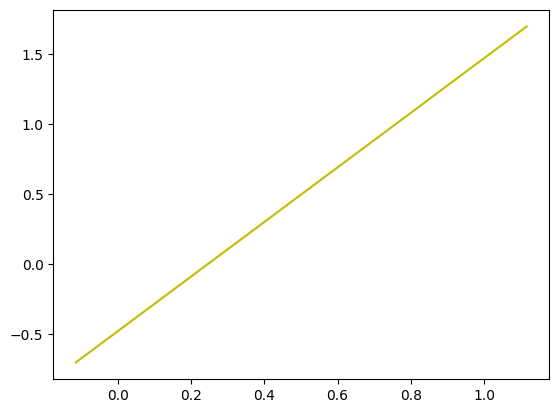

In [33]:
def separateur(g1, g2):
    """Renvoie le milieu du segment qui relie les centres de g1 et g2, et un vecteur directeur de la médiatrice."""
    c1 = barycentre(g1)
    c2 = barycentre(g2)

    # milieu
    m = ((c1[0] + c2[0]) / 2, (c1[1] + c2[1]) / 2)


    w = (c2[0] - c1[0], c2[1] - c1[1])
    
    return (m, w)



    
def plot_separateur(m,w,scale=3):
    """à partir d'un point M et un vecteur directeur w, trace un segment de la droite correspondante
    (échelle/scale à ajuster selon la figure)
    """
    tw = (-w[1],w[0])
    plt.plot([m[0]+scale*tw[0],m[0]-scale*tw[0]],[m[1]+scale*tw[1],m[1]-scale*tw[1]],"y-")


k= separateur(g1,g2)
plot_separateur(k[0],k[1],3)

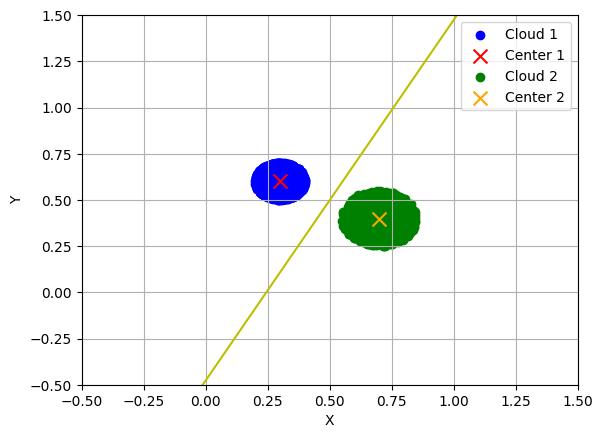

In [37]:
def plot_all(m,w,points1, center1, points2, center2, color1='blue', color2='green',scale=3):
    #1
    x_coords1 = [point[0] for point in points1]
    y_coords1 = [point[1] for point in points1]
    #2
    x_coords2 = [point[0] for point in points2]
    y_coords2 = [point[1] for point in points2]
    
    #plot1
    plt.scatter(x_coords1, y_coords1, color=color1, label='Cloud 1')
    
    
    plt.scatter(center1[0], center1[1], color='red', marker='x', s=100, label='Center 1')
    

    #plot2
    plt.scatter(x_coords2, y_coords2, color=color2, label='Cloud 2')
    
    plt.scatter(center2[0], center2[1], color='orange', marker='x', s=100, label='Center 2')
    
    tw = (-w[1],w[0])
    plt.plot([m[0]+scale*tw[0],m[0]-scale*tw[0]],[m[1]+scale*tw[1],m[1]-scale*tw[1]],"y-")



    plt.xlim(-0.5, 1.5)  
    plt.ylim(-0.5, 1.5)  

    plt.xlabel('X')
    plt.ylabel('Y')


    plt.grid(True)
    plt.legend()
    plt.show()
plot_two_clouds(k[0],k[1],g1, barycentre(g1), g2, barycentre(g2))


Tout ceci devrait vous aider à générer une figure similaire à celle-ci: 
    <img src="TP/blobs2_separateur.png">

**A FAIRE**
  
  3. Ecrivez une fonction qui classifie un point P par rapport à cette droite: ici le critère est déterminé par rapport à l'angle entre $\vec{MP}$ et $\vec{w}$, soit $cos(\vec{MP},\vec{w})>0$ (ou inférieur), ou encore
  $\vec{MP}\cdot\vec{w}>0$ (ou inférieur).
  
  Ensuite générer des points au hasard avec des coordonnées entre 0 et 1, et afficher les comme des croix (symbole 'x') avec la couleur correspondant à la classe prédite par la fonction précédente.
  
 

Bonus: vous pouvez essayer aussi avec des données "tordues", cf certains jeux de test de la librairie scikit-learn (et faire un peu de numpy !)

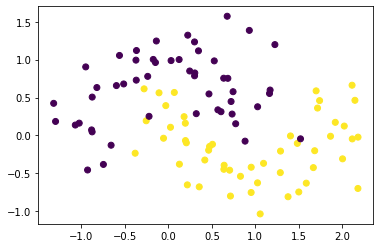

In [46]:
from sklearn.datasets import make_moons, make_circles
d = make_moons(noise=0.3, random_state=0)
xy, c = d
plt.scatter(xy[:,0],xy[:,1],c=c)

### Deuxième partie: de "vraies" données

Vous pouvez maintenant utiliser le fichier "iris.txt", en annexe du sujet. Celui-ci contient des caractéristiques de différentes fleurs de l'espèce iris, réparties en trois sous-espèces "setosa", "virginica", "versicolor". 

Vous pouvez utiliser numpy pour lire directement les données: 

In [11]:
import numpy as np
data = np.genfromtxt('iris.txt', dtype=None,delimiter=',',names=True,encoding=None)

Si on regarde le résultat, on voit que cela donne une matrice de tuples, avec les caractéristiques et la classe de chaque instance. On a aussi une liste de noms des "colonnes" de ces données: 

In [12]:
data[:4]

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')],
      dtype=[('sepal_l', '<f8'), ('sepal_w', '<f8'), ('petal_l', '<f8'), ('petal_w', '<f8'), ('classe', '<U15')])

On peut alors récupérer les colonnes par leur nom: 

In [13]:
data["classe"][:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [14]:
data["sepal_l"][:10]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9])

**A FAIRE**
    
   1. Faire une fonction qui prend 2 caractéristiques choisies sur ces données, et affiche les instances dans l'espace défini par ces deux caractéristiques, donnant une couleur différente à chaque groupe. Utilisez les fonctionalités de numpy. Par exemple on peut avoir une figure comme celle-ci:
    
 <img src="TP/iris_test.png">
   2. Appliquer la première partie pour trouver des séparateurs des données, en considérant qu'il faut un séparateur pour chaque groupe par rapport aux deux autres ensembles (toujours restreint à deux caractéristiques). Chaque choix particulier de caractéristiques donne donc 3 séparateurs par "figure".
   3. Trouver les 2 meilleures caractéristiques à prendre pour une bonne séparation, en choisissant "à l'oeil". 
   4. Tester vos "modèles" sur ce que vous avez choisi au 3), en calculant les séparateurs avec un sous-ensemble aléatoire des données (par exemple 2/3), et en évaluant s'ils classent correctement les données restantes (1/3). Comment fait-on pour classer un point si on a 3 séparateurs ? 
       
       
Et voilà, vous avez fait votre premier programme qui apprend automatiquement ...